In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Import the namaster python wrapper 

In [2]:
import pymaster as nmt

##  estimator of the angular cross-power spectrum of a spin-0 field and a
##  spin-2 field

## HEALPix resolution parameter used here

In [3]:
nside = 2048

## Read mask and apodize it on a scale of ~1deg

In [5]:
mask = nmt.mask_apodization(hp.read_map("COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits"),
                            1., apotype="Smooth")

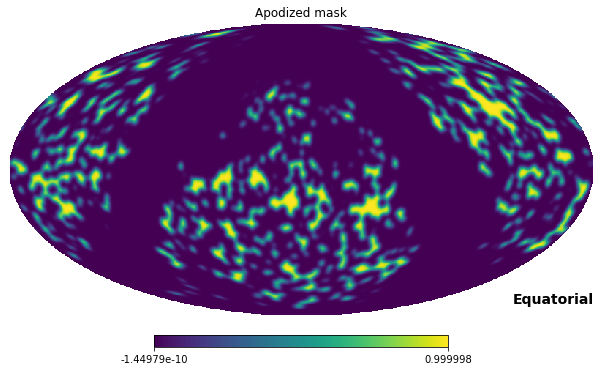

In [6]:
hp.mollview(mask, coord=['G', 'C'], title='Apodized mask')
plt.show()


## Read healpix maps and initialize a spin-0 and spin-2 field

In [7]:
f_0 = nmt.NmtField(mask, [hp.read_map("/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_full.fits", field=0)])
f_2 = nmt.NmtField(mask, hp.read_map("/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_full.fits", field=[1, 2]))


## Initialize binning scheme with 4 ells per bandpower

In [8]:
b = nmt.NmtBin.from_nside_linear(nside, 4)


## Compute MASTER estimator
## spin-0 x spin-0

In [9]:
cl_00 = nmt.compute_full_master(f_0, f_0, b)

## spin-0 x spin-2

In [10]:
cl_02 = nmt.compute_full_master(f_0, f_2, b)

## spin-2 x spin-2

In [11]:
cl_22 = nmt.compute_full_master(f_2, f_2, b)

## Plot results

## calculate the effective ell
ell_arr = b.get_effective_ells()

In [12]:
ell_arr = b.get_effective_ells()

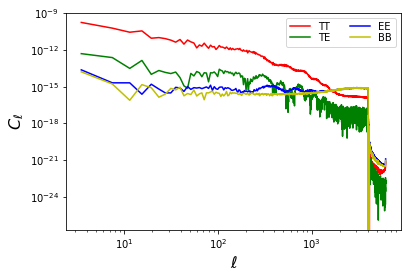

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(ell_arr, cl_00[0], 'r-', label='TT')
plt.plot(ell_arr, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(ell_arr, cl_22[0], 'b-', label='EE')
plt.plot(ell_arr, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()
plt.savefig('pseudo-cl.jpg')

In [15]:
nside = 256

In [16]:
mask = nmt.mask_apodization(hp.read_map("COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits"),
                            1., apotype="Smooth")

In [21]:
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [22]:
cl_00 = nmt.compute_full_master(f_0, f_0, b)

In [23]:
cl_02 = nmt.compute_full_master(f_0, f_2, b)

In [24]:
cl_22 = nmt.compute_full_master(f_2, f_2, b)

In [25]:
ell_arr = b.get_effective_ells()

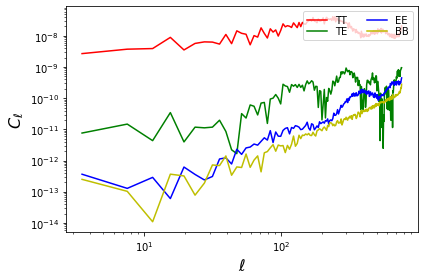

In [30]:
plt.plot(ell_arr, ell_arr*(ell_arr +1)*cl_00[0], 'r-', label='TT')
plt.plot(ell_arr,ell_arr*(ell_arr +1)*np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(ell_arr, ell_arr*(ell_arr +1)*cl_22[0], 'b-', label='EE')
plt.plot(ell_arr, ell_arr*(ell_arr +1)*cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.tight_layout()
plt.savefig('pseudoclbajopixeles.png')

In [31]:
import astropy.units as u

In [32]:
k2muK = 1e6

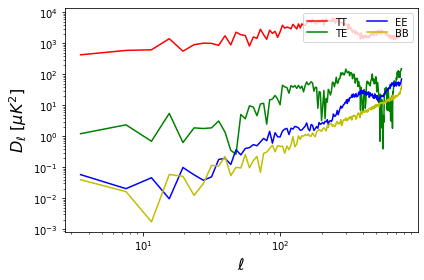

In [33]:
plt.plot(ell_arr, ell_arr*(ell_arr +1)*cl_00[0]*k2muK**2/2./np.pi, 'r-', label='TT')
plt.plot(ell_arr,ell_arr*(ell_arr +1)*np.fabs(cl_02[0])*k2muK**2/2./np.pi, 'g-', label='TE')
plt.plot(ell_arr, ell_arr*(ell_arr +1)*cl_22[0]*k2muK**2/2./np.pi, 'b-', label='EE')
plt.plot(ell_arr, ell_arr*(ell_arr +1)*cl_22[3]*k2muK**2/2./np.pi, 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\ell~[\mu K^2]$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.tight_layout()
plt.savefig('pseudoclbajopixeles1.png')